 # Import Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import torch
import torch.nn as nn

pd.options.mode.chained_assignment = None

## Question 1: Unexpected Plots 

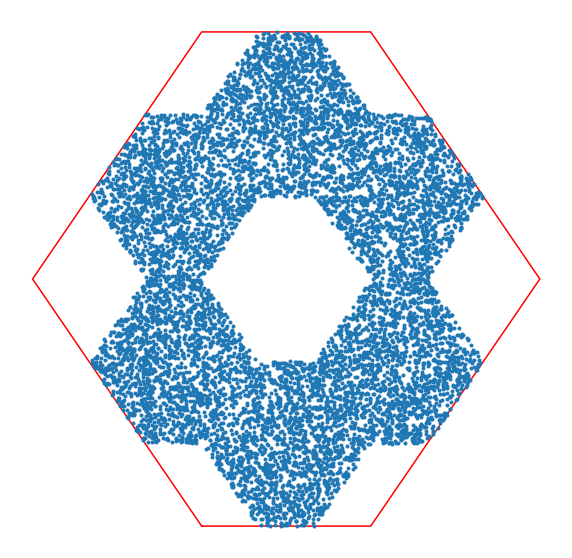

In [2]:
#vertices of the hexagon in an array
points = np.array([[2,0],[0,3],[2,6],[4,6],[6,3],[4,0],[2,0]])

#plots the hexagon 
plt.figure(figsize=(10,10))
plt.plot(points[:,0],points[:,1],'r-')

#initialize list for centroid points
lst = []

def inhexa(N): 
    ''' function to generate random point inside the hexagon'''
    
    #the points for the square containing the hexagon
    x_1 = np.linspace(0,6,N)
    y_2 = np.linspace(0,6,N)
     
    #iteration to generate a point inside the hexagon    
    while True:
        
        #random choice of points from the square
        x_t = np.random.choice(x_1)
        y_t = np.random.choice(y_2)
        
        #The equation of boundaries of the hexagon 
        eqn1 = 2*y_t + 3*x_t - 6
        eqn2 = 2*y_t - 3*x_t - 6
        eqn3 = 3*x_t - 2*y_t - 12
        eqn4 = 2*y_t + 3*x_t - 24
        eqn5 = x_t - 6
        
        #condition for the region in the hexagon
        if (eqn1 > 0) & (eqn2<0) & (eqn3<0) & (eqn4<0) & (eqn5 < 0) & (x_t > 0):
            break
        
    return [x_t,y_t]

for i in range(10000):
    
    # Generates random point in the hexagon
    P = inhexa(1000)
    
    # for the two random vertices adjacent to themselves
    num = np.random.choice(range(6))
    vertice1 = points[num,:]
    vertice2 = points[num+1,:]
    
    # computes the new centroid 
    P = [1/3 *(P[0]+vertice1[0]+ vertice2[0]), 1/3 *(P[1]+vertice1[1]+ vertice2[1])]
    
    # appends new centroid to the list
    lst.append(P)
    
#changing lst to array for easy plot
centroids =  np.asarray(lst)

#plot of centroid points
plt.plot(centroids[:,0],centroids[:,1],'.')
plt.axis('off')
plt.show()

## Question 2: Datascience with Pandas and Movie Data

### Loading files using Pandas

In [3]:
basics = pd.read_csv('title.basics.tsv.gz', compression='gzip', header=0,\
                     sep ='\t',on_bad_lines='skip')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
akas = pd.read_csv('title.akas.tsv.gz', compression='gzip', header=0,\
                   sep ='\t',on_bad_lines='skip')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
ratings = pd.read_csv('title.ratings.tsv.gz', compression='gzip', header=0, \
                      sep ='\t', on_bad_lines='skip')

In [6]:
ratings

,tconst,averageRating,numVotes
0,tt0000001,5.8,1422
1,tt0000002,6.4,168
2,tt0000003,6.6,1015
3,tt0000004,6.4,100
4,tt0000005,6.2,1713
...,...,...,...
874198,tt9100972,7.0,5
874199,tt9104810,7.0,7
874200,tt9106766,7.6,5
874201,tt9107292,8.4,10


In [7]:
akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
...,...,...,...,...,...,...,...,...
3423655,tt9118622,2,Bundesliga Stars 2001,DE,\N,imdbDisplay,\N,0
3423656,tt9118622,3,The F.A. Premier League Stars 2001,\N,\N,original,\N,1
3423657,tt9118622,4,LNF Stars 2001,FR,\N,imdbDisplay,\N,0
3423658,tt9118622,5,K-League Stars 2001,KR,\N,imdbDisplay,\N,0


In [8]:
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
5330271,tt9120652,tvEpisode,Episode #18.93,Episode #18.93,0,\N,\N,\N,"Comedy,Drama,Family"
5330272,tt9120654,tvEpisode,Episode #18.95,Episode #18.95,0,\N,\N,\N,"Comedy,Drama,Family"
5330273,tt9120656,short,Upon Arrival,Upon Arrival,0,2018,\N,10,"Horror,Short"
5330274,tt9120782,videoGame,UEFA Euro 96 England,UEFA Euro 96 England,0,1995,\N,\N,\N


### Duplicate Check

In [9]:
ratings.duplicated().value_counts()

False    874203
dtype: int64

In [10]:
akas.duplicated().value_counts()

False    3423660
dtype: int64

In [11]:
basics.duplicated().value_counts()

False    5330276
dtype: int64

### Merging Dataframes 

In [12]:
# For the inner join of all three dataframes
merged_df_inner = basics.merge(ratings, on='tconst', how='inner')
merged_df_inner = merged_df_inner.merge(akas, left_on='tconst', right_on='titleId', how='inner')
merged_df_inner

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,168,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686542,tt9100068,short,Ptichiy prazdnik,Ptichiy prazdnik,0,1976,\N,9,"Animation,Short",7.0,5,tt9100068,2,Птичий праздник,SUHH,ru,\N,\N,0
1686543,tt9100098,short,Malinovka i medved,Malinovka i medved,0,1983,\N,9,"Animation,Short",7.0,5,tt9100098,1,Малиновка и медведь,SUHH,ru,\N,\N,0
1686544,tt9100098,short,Malinovka i medved,Malinovka i medved,0,1983,\N,9,"Animation,Short",7.0,5,tt9100098,2,Malinovka i medved,\N,\N,original,\N,1
1686545,tt9100972,short,Kogda Medvezhonok prosnetsya,Kogda Medvezhonok prosnetsya,0,1979,\N,16,"Animation,Short",7.0,5,tt9100972,1,Kogda Medvezhonok prosnetsya,\N,\N,original,\N,1


In [13]:
# The outerjoin of all three dataframes
merged_df_outer = basics.merge(ratings, on='tconst', how='outer')
merged_df_outer = merged_df_outer.merge(akas, left_on='tconst', right_on='titleId', how='outer')
merged_df_outer

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0,tt0000001,1.0,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0,tt0000001,2.0,Карменсита,RU,\N,\N,\N,0
2,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0,tt0000001,3.0,Carmencita,US,\N,\N,\N,0
3,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0,tt0000001,4.0,Carmencita,\N,\N,original,\N,1
4,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short",6.4,168.0,tt0000002,1.0,Le clown et ses chiens,\N,\N,original,\N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt7766088,1.0,Casting-Show,DE,\N,\N,\N,0
6740085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt7779806,1.0,Tanos,US,\N,\N,\N,0
6740086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt7869672,1.0,Christian Movie: The Cover-up - India,KR,\N,\N,\N,0
6740087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt7892078,1.0,New Heaven and New Earth,KR,\N,\N,\N,0


The inner merge which is the intersection of all three dataframes has 1686547 rows while the outer merge which is the union of all three dataframes has 6740089 rows

In [14]:
# Unique title types for the innerjoin dataframe
merged_df_inner.titleType.unique()

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [15]:
# Unique title types for the innerjoin dataframe
merged_df_outer.titleType.unique()

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', nan],
      dtype=object)

There are 10 different title types in the dataframes in both the intersection dataframe and union dataframe

In [16]:
# Identifying dataset that corresponds to English-language films ('en') OR US-region films ('US')
# and only those that are movies(using the 'titleType' column) using the inner join
df_new = merged_df_inner[((merged_df_inner.region == 'US')| \
                         (merged_df_inner.language == 'en'))& \
                         (merged_df_inner.titleType == 'movie')]
df_new

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
51,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.5,70,tt0000009,3,Miss Jerry,US,\N,\N,\N,0
574,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport",5.2,266,tt0000147,1,The Corbett-Fitzsimmons Fight,US,\N,\N,\N,0
1446,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,3.1,10,tt0000630,4,Hamlet,US,\N,\N,\N,0
1520,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy",5.9,26,tt0000679,1,The Fairylogue and Radio-Plays,US,\N,\N,\N,0
1797,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0,1910,\N,\N,Drama,5.2,16,tt0000886,2,"Hamlet, Prince of Denmark",US,\N,\N,\N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686422,tt9020894,movie,Temporary Difficulties,Vremennye trudnosti,0,2018,\N,86,Drama,4.5,20,tt9020894,4,Temporary Difficulties,US,\N,imdbDisplay,\N,0
1686485,tt9056646,movie,Bearer,Dar Vajhe Hamel,0,2018,\N,90,Drama,7.0,9,tt9056646,3,Bearer,XWW,en,imdbDisplay,\N,0
1686494,tt9060058,movie,Tuulte tahutud maa,Tuulte tahutud maa,0,2018,\N,63,Documentary,8.1,17,tt9060058,3,The Wind Sculpted Land,XWW,en,alternative,\N,0
1686520,tt9081472,movie,Aickarakkonathe Bhishaguaranmaar,Aickarakkonathe Bhishaguaranmaar,0,2018,\N,144,Drama,9.1,213,tt9081472,2,Physicians of Aickarakkonam,IN,en,\N,literal English title,0


In [17]:
# Creating a new column with contains log_10 of the number of votes
df_new.loc[:,'log10Votes'] = df_new['numVotes'].apply(lambda x: np.log10(x))

In [18]:
# Lower the case of all text in the 'genres' column
df_new.genres = df_new.genres.str.lower()

In [19]:
df_new.set_index('genres')

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,log10Votes
genres,,,,,,,,,,,,,,,,,,,
romance,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,5.5,70,tt0000009,3,Miss Jerry,US,\N,\N,\N,0,1.845098
"documentary,news,sport",tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,5.2,266,tt0000147,1,The Corbett-Fitzsimmons Fight,US,\N,\N,\N,0,2.424882
drama,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,3.1,10,tt0000630,4,Hamlet,US,\N,\N,\N,0,1.000000
"adventure,fantasy",tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,5.9,26,tt0000679,1,The Fairylogue and Radio-Plays,US,\N,\N,\N,0,1.414973
drama,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0,1910,\N,\N,5.2,16,tt0000886,2,"Hamlet, Prince of Denmark",US,\N,\N,\N,0,1.204120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
drama,tt9020894,movie,Temporary Difficulties,Vremennye trudnosti,0,2018,\N,86,4.5,20,tt9020894,4,Temporary Difficulties,US,\N,imdbDisplay,\N,0,1.301030
drama,tt9056646,movie,Bearer,Dar Vajhe Hamel,0,2018,\N,90,7.0,9,tt9056646,3,Bearer,XWW,en,imdbDisplay,\N,0,0.954243
documentary,tt9060058,movie,Tuulte tahutud maa,Tuulte tahutud maa,0,2018,\N,63,8.1,17,tt9060058,3,The Wind Sculpted Land,XWW,en,alternative,\N,0,1.230449


In [20]:
vote_group = df_new.groupby(
    'genres').mean()['log10Votes'].sort_values(ascending=False).reset_index()
vote_group.head(10)

,genres,log10Votes
0,"action,fantasy,war",5.405722
1,"action,family,romance",4.801753
2,"animation,drama,war",4.396304
3,"family,music,musical",4.396252
4,"documentary,sport,thriller",4.386731
5,"action,adventure,sci-fi",4.373261
6,"horror,musical,sci-fi",4.340484
7,"biography,fantasy,horror",4.271842
8,"adventure,sci-fi,thriller",4.180897
9,"adventure,drama,sci-fi",4.123983


In [21]:
rating_group = df_new.groupby(
    'genres').mean()['averageRating'].sort_values(ascending=False).reset_index()
rating_group.head(10)

,genres,averageRating
0,"documentary,history,western",9.300000
1,"history,sport",9.200000
2,"documentary,news,reality-tv",8.800000
3,"animation,crime,documentary",8.525000
4,"biography,history,music",8.500000
5,"documentary,drama,thriller",8.433333
6,"adventure,documentary,western",8.433333
7,"comedy,mystery,sport",8.400000
8,"action,documentary,fantasy",8.300000
9,"biography,documentary,talk-show",8.300000


In [22]:
com_data = vote_group.merge(rating_group, on ='genres', how ='inner')

In [23]:
com_data

,genres,log10Votes,averageRating
0,"action,fantasy,war",5.405722,6.200000
1,"action,family,romance",4.801753,6.000000
2,"animation,drama,war",4.396304,8.185714
3,"family,music,musical",4.396252,5.900000
4,"documentary,sport,thriller",4.386731,7.900000
...,...,...,...
1108,"action,musical,war",0.698970,5.400000
1109,"animation,short",0.698970,8.200000
1110,"fantasy,horror,music",0.698970,6.600000
1111,"action,documentary,horror",0.698970,6.400000


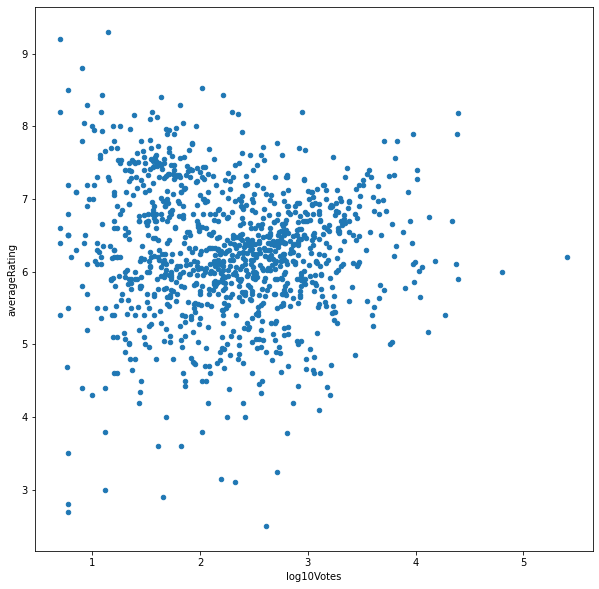

In [24]:
# Scatter diagram of averageRating vs log10Votes
com_data.plot.scatter(x='log10Votes', y='averageRating',figsize =(10,10))
plt.show()

In [38]:
# Linear regression model using scipy
reg_scipy = stats.linregress(com_data.log10Votes, com_data.averageRating)

In [ ]:
# Linear regression model using sklearn
model = LinearRegression()
reg_sklearn = model.fit(np.asarray(com_data.log10Votes).reshape(-1, 1), com_data.averageRating)

In [ ]:
# Linear regression model using pytorch

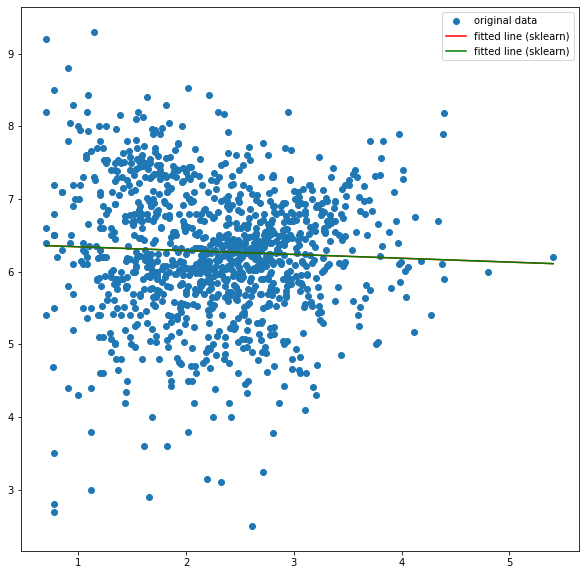

In [41]:
#plot of the original data and fitted lines lines using sklearn, scipy and pytorch
plt.figure(figsize=(10,10))
plt.plot(com_data.log10Votes, com_data.averageRating, 'o', label='original data')
plt.plot(com_data.log10Votes, reg_scipy.intercept + reg_scipy.slope*com_data.log10Votes, 'r', label='fitted line (sklearn)')
plt.plot(com_data.log10Votes, reg_sklearn.intercept_ + reg_sklearn.coef_*com_data.log10Votes, 'g', label='fitted line (sklearn)')
plt.legend()
plt.show()